In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import os

df_no_hw = pd.read_feather('/Trex/case_results/i.e215.I2000Clm50SpGs.hw_production.02/research_results/summary/investigate_FSH_no_hw.feather')
df_hw = pd.read_feather('/Trex/case_results/i.e215.I2000Clm50SpGs.hw_production.02/research_results/summary/investigate_FSH_hw.feather')
df_hw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61524648 entries, 9307152 to 59963591
Data columns (total 18 columns):
 #   Column           Dtype         
---  ------           -----         
 0   time             datetime64[ns]
 1   lat              float32       
 2   lon              float32       
 3   Q2M              float32       
 4   FSH              float32       
 5   EFLX_LH_TOT      float32       
 6   FSA              float32       
 7   U10              float32       
 8   hour             int32         
 9   month            int32         
 10  year             int32         
 11  local_time       datetime64[ns]
 12  local_hour       int32         
 13  location_ID      int64         
 14  time_diff        float64       
 15  new_event        bool          
 16  event_ID         int64         
 17  global_event_ID  object        
dtypes: bool(1), datetime64[ns](2), float32(7), float64(1), int32(4), int64(2), object(1)
memory usage: 5.8+ GB


#  check the row count for each location

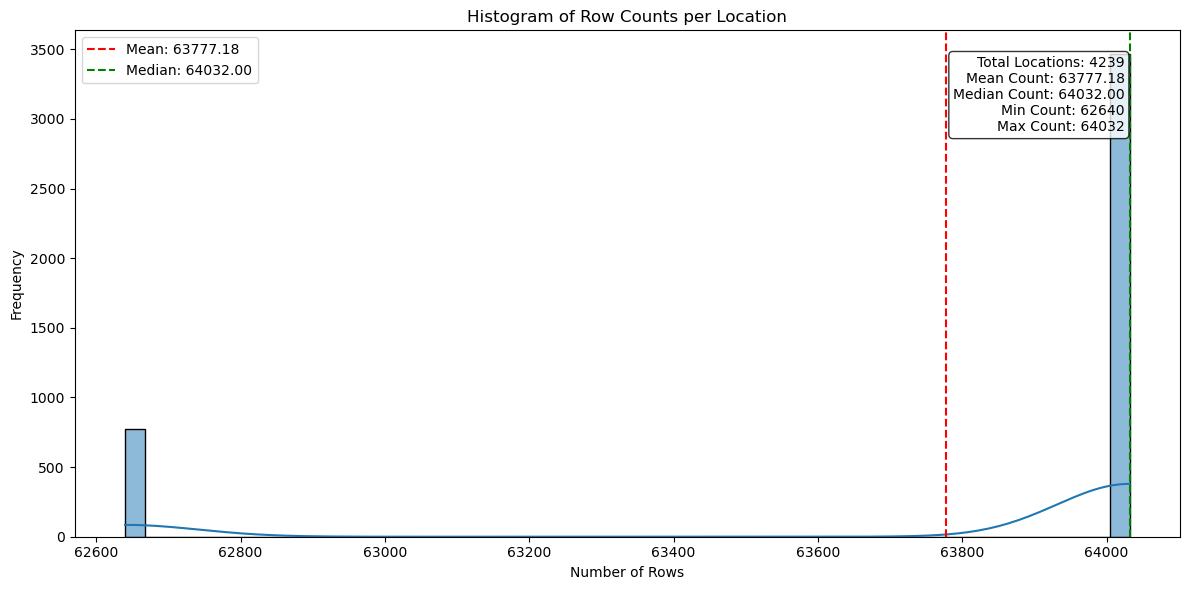

count     4239.000000
mean     63777.177636
std        538.374098
min      62640.000000
25%      64032.000000
50%      64032.000000
75%      64032.000000
max      64032.000000
Name: count, dtype: float64

Locations with unusually low counts:
Empty DataFrame
Columns: [location_ID, count]
Index: []

Locations with unusually high counts:
Empty DataFrame
Columns: [location_ID, count]
Index: []


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_hw and df_no_hw are already loaded

# Concatenate the two dataframes
df_combined = pd.concat([df_hw, df_no_hw], keys=['HW', 'NO_HW'])
df_combined.reset_index(level=0, inplace=True)
df_combined.rename(columns={'level_0': 'data_type'}, inplace=True)

# Group by location_ID and count the rows
location_counts = df_combined.groupby('location_ID').size().reset_index(name='count')

# Calculate statistics
total_locations = len(location_counts)
mean_count = location_counts['count'].mean()
median_count = location_counts['count'].median()
min_count = location_counts['count'].min()
max_count = location_counts['count'].max()

# Plot histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=location_counts, x='count', bins=50, kde=True)
plt.title('Histogram of Row Counts per Location')
plt.xlabel('Number of Rows')
plt.ylabel('Frequency')

# Add vertical lines for mean and median
plt.axvline(mean_count, color='r', linestyle='--', label=f'Mean: {mean_count:.2f}')
plt.axvline(median_count, color='g', linestyle='--', label=f'Median: {median_count:.2f}')

plt.legend()

# Add text box with statistics
stats_text = f'Total Locations: {total_locations}\n' \
             f'Mean Count: {mean_count:.2f}\n' \
             f'Median Count: {median_count:.2f}\n' \
             f'Min Count: {min_count}\n' \
             f'Max Count: {max_count}'
plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes, 
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Print summary statistics
print(location_counts['count'].describe())

# Check for locations with unusually low or high counts
low_count_threshold = location_counts['count'].quantile(0.01)
high_count_threshold = location_counts['count'].quantile(0.99)

print("\nLocations with unusually low counts:")
print(location_counts[location_counts['count'] < low_count_threshold])

print("\nLocations with unusually high counts:")
print(location_counts[location_counts['count'] > high_count_threshold])

In [5]:
# show distinct values of location_counts.count
location_counts['count'].value_counts().sort_index()

count
62640     776
64032    3463
Name: count, dtype: int64

In [1]:
776+ 3463

4239